In [11]:
import copy
from keras.models import Sequential
from keras.models import clone_model
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import progressbar
import time
np.random.seed(0)

In [2]:
model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(3, activation='linear'))
model.compile(loss='mse', optimizer=Adam(lr=0.001))

In [15]:
deep_copy_results = []
bar = progressbar.ProgressBar()
for n in bar(range(10)):
    time_1 = time.time()
    for _ in range(n):
        copy_model = copy.deepcopy(model)
    time_2 = time.time()
    deep_copy_results.append(time_2 - time_1)

100% (10 of 10) |########################| Elapsed Time: 0:05:29 Time:  0:05:29


In [16]:
clone_results = []
bar = progressbar.ProgressBar()
for n in bar(range(10)):
    time_1 = time.time()
    for _ in range(n):
        copy_model = clone_model(model)
        copy_model.set_weights(model.get_weights())
    time_2 = time.time()
    clone_results.append(time_2 - time_1)

100% (10 of 10) |########################| Elapsed Time: 0:06:31 Time:  0:06:31


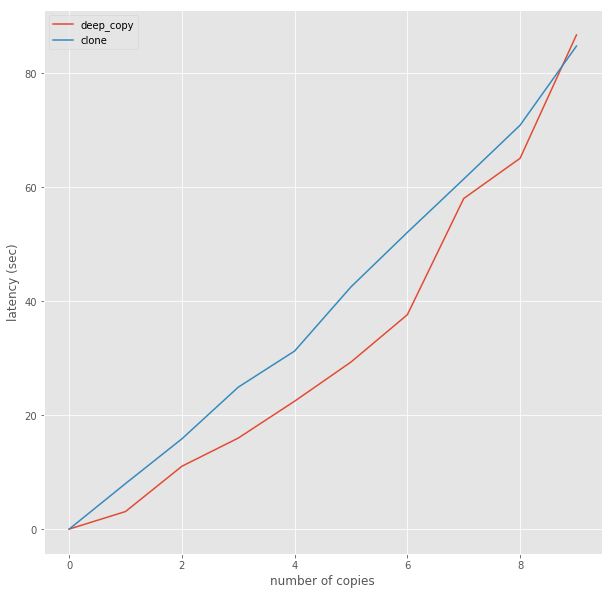

In [17]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(10,10))
ax.set_ylabel('latency (sec)')
ax.set_xlabel('number of copies')
ax.plot(deep_copy_results, label='deep_copy')
ax.plot(clone_results, label='clone')
plt.legend()
# plt.savefig('predict_latency.png')
plt.show()